In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from PIL import Image

In [0]:
INIT_LR = 1e-3 #learning rate
EPOCHS = 27
BS = 6

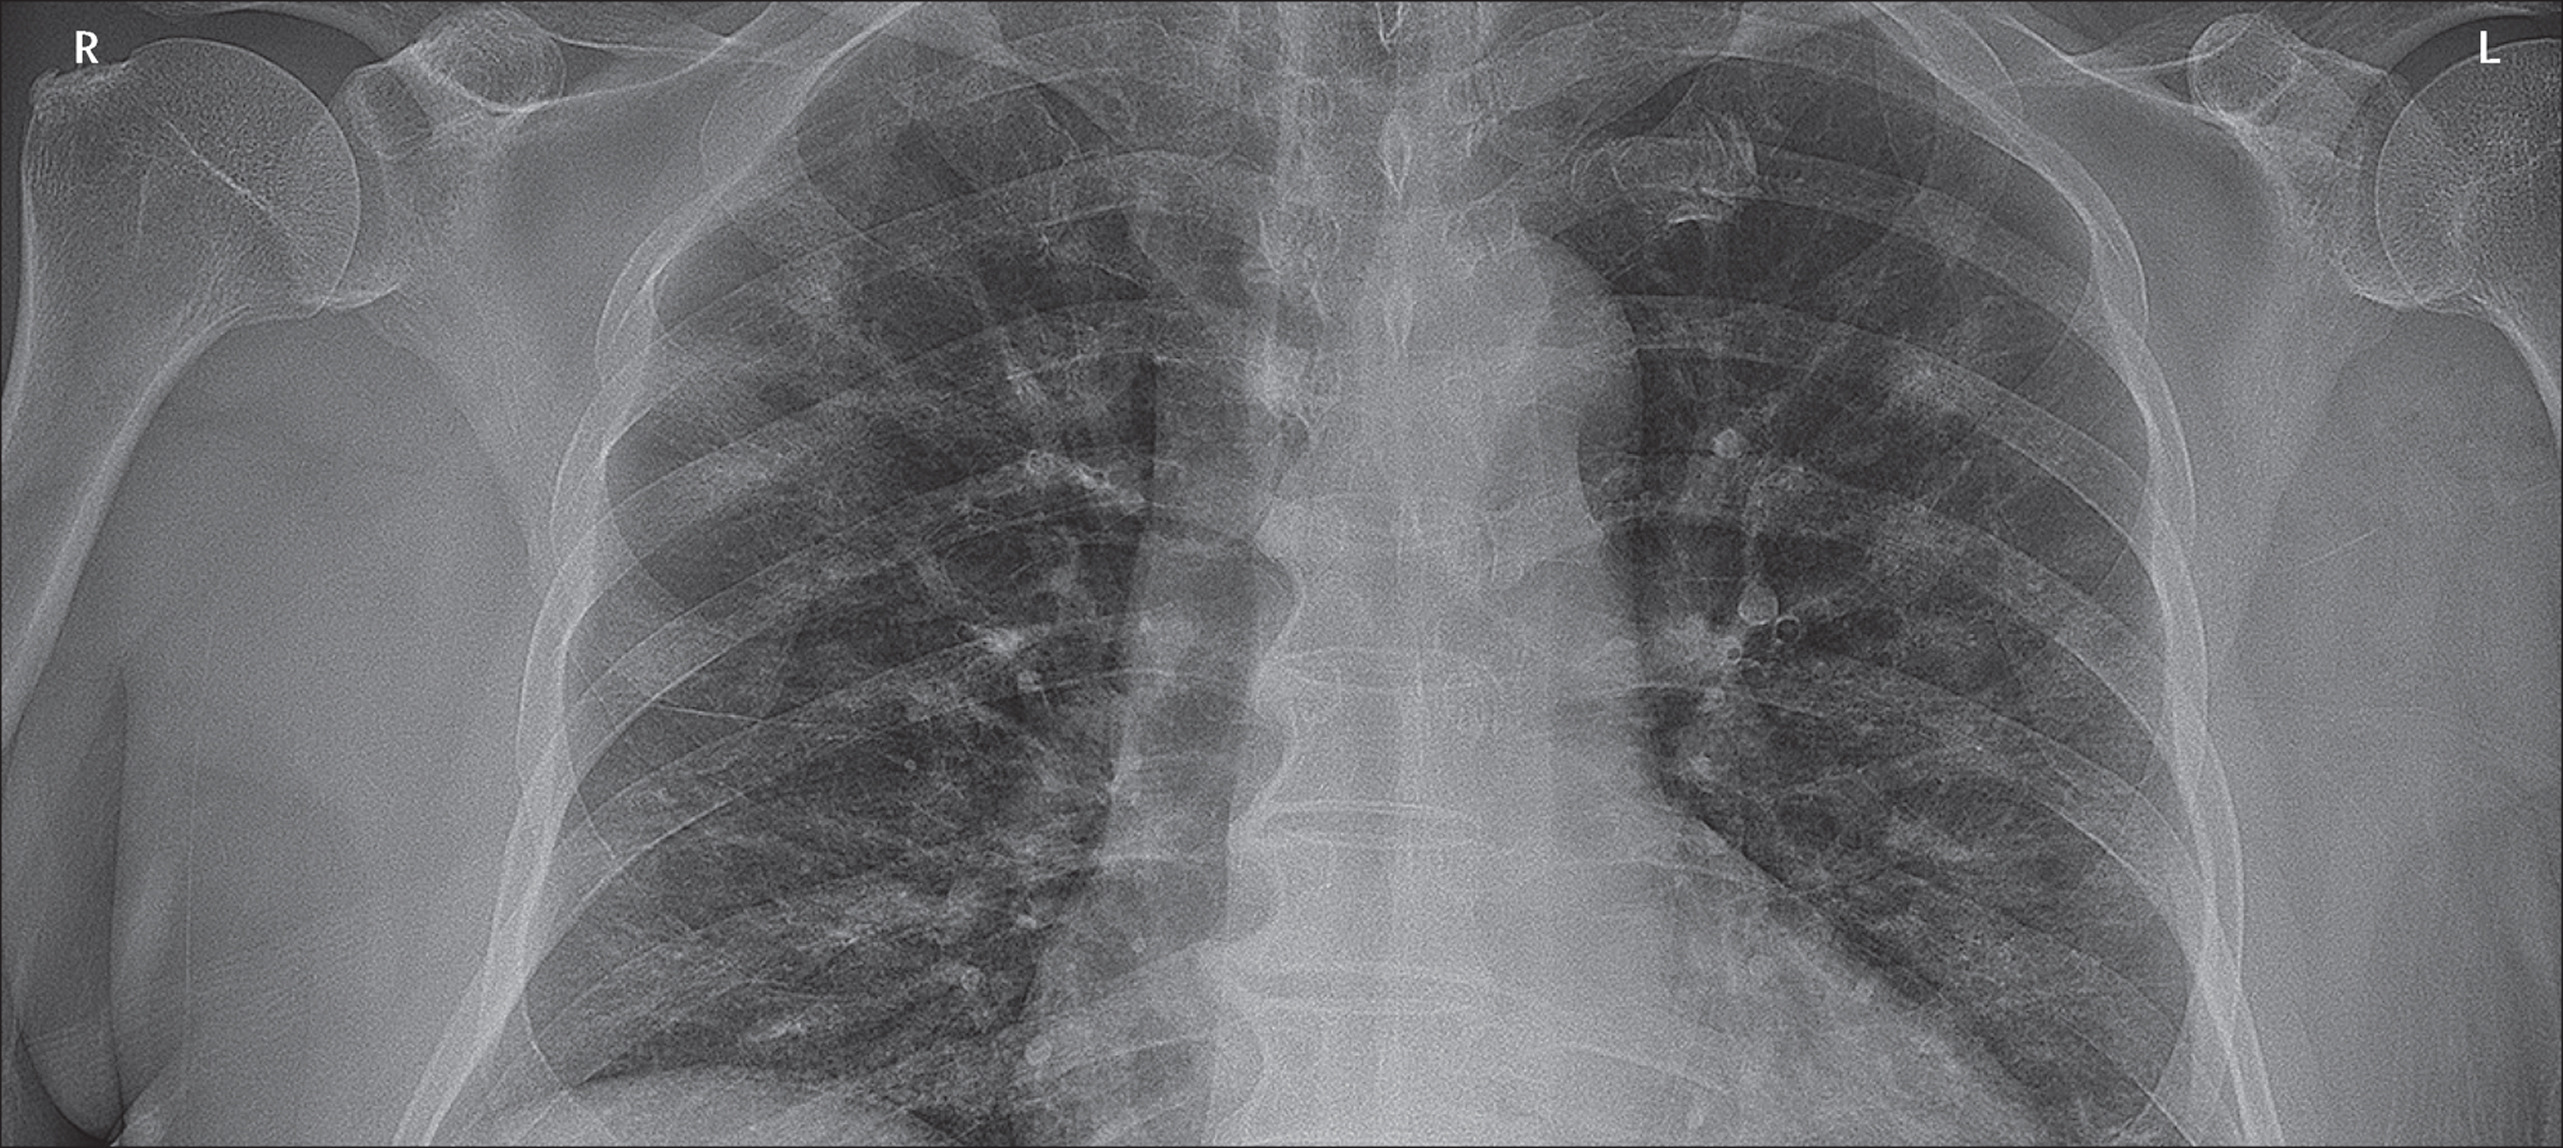

In [67]:
#check if images loaded correctly
base_path = '/content/drive/My Drive/Covid Project/Covid Detection'
detection_images = base_path + '/images'

Image.open(detection_images+'/positive/1-s2.0-S0140673620303706-fx1_lrg.jpg')

In [0]:
detection_images = list(paths.list_images('/content/drive/My Drive/Covid Project/Covid Detection/images'))
image_data = []
image_labels = []

for detect_image in detection_images:
  single_image = cv2.imread(detect_image)
  image_data.append(single_image)




In [88]:
for _ in image_data:
  i1 = np.array(_)
  print(i1.shape)

(616, 976, 3)
(560, 904, 3)
(1422, 1802, 3)
(840, 1240, 3)
(832, 1112, 3)
(1264, 1600, 3)
(463, 827, 3)
(624, 1112, 3)
(1063, 1534, 3)
(1152, 1504, 3)
(1104, 1584, 3)
(704, 944, 3)
(770, 1442, 3)
(792, 1264, 3)
(1184, 1408, 3)
(1264, 1392, 3)
(952, 1432, 3)
(840, 1480, 3)
(672, 832, 3)
(488, 760, 3)
(1372, 1742, 3)
(1953, 2170, 3)
(594, 947, 3)
(1708, 1944, 3)
(490, 821, 3)
(888, 882, 3)
(1330, 1187, 3)
(1165, 1165, 3)
(1148, 2563, 3)
(1332, 1175, 3)
(1161, 1170, 3)
(876, 882, 3)
(1333, 1118, 3)
(842, 1090, 3)
(1163, 1165, 3)
(874, 880, 3)
(1439, 1800, 3)
(1272, 1645, 3)
(4095, 3342, 3)
(630, 700, 3)
(1308, 1652, 3)
(1262, 1261, 3)
(1402, 1401, 3)
(1412, 1404, 3)
(891, 880, 3)
(1161, 1166, 3)
(1343, 1300, 3)
(874, 1104, 3)
(841, 1107, 3)
(1570, 1695, 3)
(1482, 1989, 3)


In [69]:
!ls '/content/drive/My Drive/Covid Project/Covid Detection'

covid19.model  graph.png  images  main.py


In [0]:

detection_images = list(paths.list_images('/content/drive/My Drive/Covid Project/Covid Detection/images'))
image_data = []
image_labels = []
#iterate through the images
for detect_image in detection_images:
	# store whether positive or negative in labels
	label = detect_image.split(os.path.sep)[-2]
	image = cv2.imread(detect_image)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	# update the data and labels lists, respectively
	image_data.append(image)
	image_labels.append(label)


In [71]:
image_labels.count('negative')

26

In [72]:
image_labels.count('positive')

26

In [73]:
image_data

[array([[[254, 254, 254],
         [177, 177, 175],
         [178, 178, 176],
         ...,
         [ 72,  73,  75],
         [ 73,  74,  76],
         [ 65,  66,  68]],
 
        [[254, 254, 254],
         [179, 179, 177],
         [183, 183, 181],
         ...,
         [ 78,  79,  82],
         [ 73,  74,  76],
         [ 65,  66,  68]],
 
        [[255, 255, 255],
         [181, 181, 179],
         [184, 184, 182],
         ...,
         [ 91,  92,  95],
         [ 75,  76,  78],
         [ 64,  65,  67]],
 
        ...,
 
        [[253, 253, 253],
         [ 56,  57,  59],
         [ 64,  65,  67],
         ...,
         [102, 103, 107],
         [102, 103, 107],
         [100, 101, 105]],
 
        [[253, 253, 253],
         [ 56,  57,  59],
         [ 64,  64,  67],
         ...,
         [100, 101, 105],
         [103, 104, 108],
         [101, 102, 106]],
 
        [[253, 253, 253],
         [ 56,  57,  59],
         [ 65,  65,  67],
         ...,
         [108, 109, 113],
  

In [74]:
image_labels

['positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative']

In [0]:
#rescale the images
image_data = np.array(image_data) / 255.0
image_labels = np.array(image_labels)

In [76]:
image_data

array([[[[0.99607843, 0.99607843, 0.99607843],
         [0.69411765, 0.69411765, 0.68627451],
         [0.69803922, 0.69803922, 0.69019608],
         ...,
         [0.28235294, 0.28627451, 0.29411765],
         [0.28627451, 0.29019608, 0.29803922],
         [0.25490196, 0.25882353, 0.26666667]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.70196078, 0.70196078, 0.69411765],
         [0.71764706, 0.71764706, 0.70980392],
         ...,
         [0.30588235, 0.30980392, 0.32156863],
         [0.28627451, 0.29019608, 0.29803922],
         [0.25490196, 0.25882353, 0.26666667]],

        [[1.        , 1.        , 1.        ],
         [0.70980392, 0.70980392, 0.70196078],
         [0.72156863, 0.72156863, 0.71372549],
         ...,
         [0.35686275, 0.36078431, 0.37254902],
         [0.29411765, 0.29803922, 0.30588235],
         [0.25098039, 0.25490196, 0.2627451 ]],

        ...,

        [[0.99215686, 0.99215686, 0.99215686],
         [0.21960784, 0.22352941, 0.23137255]

In [0]:
#binarize the the labels into an array of either 0's or 1's
lb = LabelBinarizer()
image_labels = lb.fit_transform(image_labels)
image_labels = to_categorical(image_labels)
# split the data into training and testing data while reserving 80%
# for training and 20% for testing
(trainX, testX, trainY, testY) = train_test_split(image_data, image_labels,
	test_size=0.20, stratify=labels, random_state=42)
# initialize the training data augmentation object
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

In [79]:
image_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [0]:
# use InceptionV3 as base model
baseModel = InceptionV3(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(2, 2))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(32, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [60]:
#compile model
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# training the top
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

Epoch 1/27
6/6 [==============================] - 2s 292ms/step - loss: 1.3256 - accuracy: 0.5556 - val_loss: 0.2770 - val_accuracy: 0.7273
Epoch 2/27
6/6 [==============================] - 0s 74ms/step - loss: 1.9434 - accuracy: 0.6571 - val_loss: 0.1182 - val_accuracy: 1.0000
Epoch 3/27
6/6 [==============================] - 0s 73ms/step - loss: 1.7576 - accuracy: 0.6571 - val_loss: 0.1635 - val_accuracy: 0.9091
Epoch 4/27
6/6 [==============================] - 0s 75ms/step - loss: 0.2945 - accuracy: 0.8571 - val_loss: 0.1283 - val_accuracy: 0.9091
Epoch 5/27
6/6 [==============================] - 0s 72ms/step - loss: 0.6229 - accuracy: 0.8286 - val_loss: 0.0968 - val_accuracy: 1.0000
Epoch 6/27
6/6 [==============================] - 0s 70ms/step - loss: 0.3536 - accuracy: 0.9143 - val_loss: 0.2035 - val_accuracy: 1.0000
Epoch 7/27
6/6 [==============================] - 0s 69ms/step - loss: 0.2323 - accuracy: 0.8857 - val_loss: 0.1827 - val_accuracy: 0.9091
Epoch 8/27
6/6 [==========

In [61]:

predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print('Classication Report')
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

Classication Report
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00         6
    positive       1.00      1.00      1.00         5

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [62]:
# compute the confusion matrix and 
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[6 0]
 [0 5]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


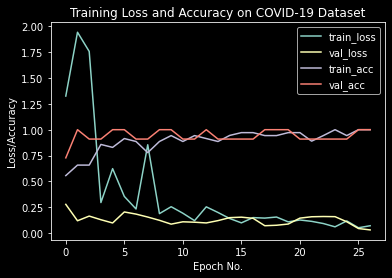

In [63]:
# plot the training loss and accuracy
plt.style.use("dark_background")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch No.")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.savefig('/content/drive/My Drive/Covid Project/Covid Detection/graph.png')

In [0]:
#save the model
model.save('/content/drive/My Drive/Covid Project/Covid Detection/covid19.model', save_format="h5")